# Testing `physiokinematic` models
Trey Wenger - September 2024

In [1]:
from physiokinematic.simulate import simulate
# Generate synthetic dataset
data = simulate(100, seed=1234)

In [2]:
data.keys()

Index(['glong', 'glat', 'vlsr', 'e_vlsr', 'radius', 'true_te', 'te', 'e_te',
       'line', 'e_line', 'line_unit', 'fwhm', 'line_freq', 'telescope',
       'beam_area', 'Rgal', 'distance', 'log10_n', 'log10_q', 'log10_Rs',
       'log10_em', 'kdar'],
      dtype='object')

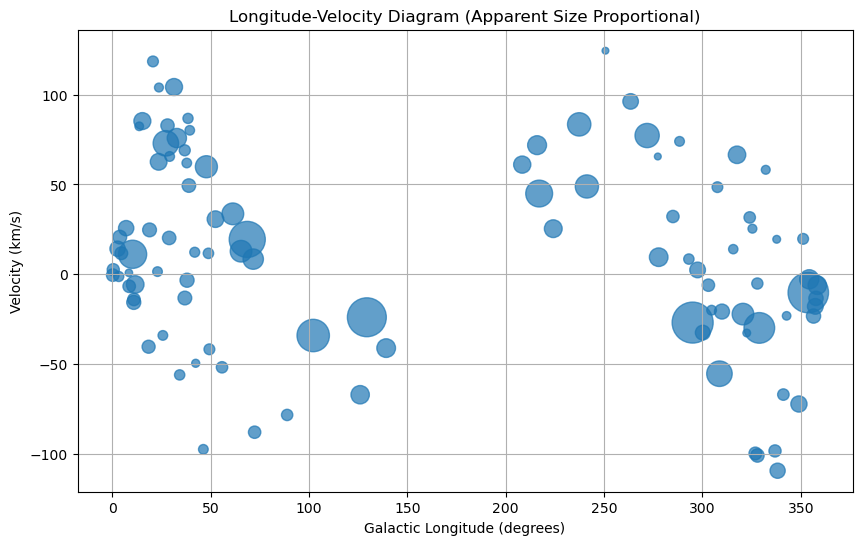

In [ ]:
plot_longitude_velocity_diagram(data)

In [ ]:
vlsr.eval()

In [ ]:
data

In [ ]:
from physiokinematic.NEWmodel import model as pkmodel
# setup model
model = pkmodel(data)

In [ ]:
# visualize model
model.to_graphviz()

In [ ]:
import pymc as pm

# sample prior predictive
with model:
    prior = pm.sample_prior_predictive(1000)

In [ ]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots(figsize=(10, 8))
for draw in prior.prior_predictive.draw:
    ax.plot(
        data["glong"],
        prior.prior_predictive["line"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["line"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("log$_{10}$ Line (K)")
ax.set_yscale("log")
ax.set_xlim(360.0, 0.0)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in prior.prior_predictive.draw:
    ax.plot(
        data["glong"],
        prior.prior_predictive["vlsr"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["vlsr"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("VLSR (km/s)")
ax.set_xlim(360.0, 0.0)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in prior.prior_predictive.draw:
    ax.plot(
        data.loc[~data["te"].isna(), "glong"],
        prior.prior_predictive["te_observed"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["te"], "r.")
ax.set_yscale('log')
ax.set_xlabel("Longitude")
ax.set_ylabel("Electron Temperature (K)")
ax.set_xlim(360.0, 0.0)

In [ ]:
# sample posterior
with model:
    trace = pm.sample(chains=8, cores=8, tune=1000, draws=1000, target_accept=0.85)

In [ ]:
 pm.summary(trace, var_names=['kdar_w'])

In [ ]:
# sample posterior predictive
with model:
    posterior = pm.sample_posterior_predictive(trace.sel(draw=slice(None, None, 10)))

In [ ]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots(figsize=(10, 8))
for draw in posterior.posterior_predictive.draw:
    ax.plot(
        data["glong"],
        posterior.posterior_predictive["line"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["line"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("log$_{10}$ Line (K)")
ax.set_yscale("log")
ax.set_xlim(360.0, 0.0)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in posterior.posterior_predictive.draw:
    ax.plot(
        data["glong"],
        posterior.posterior_predictive["vlsr"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["vlsr"], "r.")
ax.set_xlabel("Longitude")
ax.set_ylabel("VLSR (km/s)")
ax.set_xlim(360.0, 0.0)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
for draw in posterior.posterior_predictive.draw:
    ax.plot(
        data.loc[~data["te"].isna(), "glong"],
        posterior.posterior_predictive["te_observed"].sel(chain=0, draw=draw),
        "k.",
        alpha=0.05,
    )
ax.plot(data["glong"], data["te"], "r.")
ax.set_yscale('log')
ax.set_xlabel("Longitude")
ax.set_ylabel("Electron Temperature (K)")
ax.set_xlim(360.0, 0.0)

In [33]:

from physiokinematic.simulate import simulate
hii_data = simulate(1000)  # Step 1: Simulate HII regions

In [11]:
hii_data

,glong,glat,vlsr,e_vlsr,radius,true_te,te,e_te,line,e_line,...,line_freq,telescope,beam_area,Rgal,distance,log10_n,log10_q,log10_Rs,log10_em,kdar
0,224.155771,2.075929,25.382395,1.0,163.920912,6774.609351,NaN,100.0,17.578233,0.1,...,8000.0,simulated,9178.029287,9.732297,2.039377,1.681512,47.558143,0.209706,3.873760,
1,25.697834,0.115207,-34.076411,1.0,48.477137,6197.743804,6197.743804,100.0,2.740321,0.1,...,8000.0,simulated,9178.029287,11.820265,18.635783,1.296064,48.082505,0.641459,3.534617,
2,237.333227,-0.484440,83.502886,1.0,282.857187,7210.781999,NaN,100.0,18.453799,0.1,...,8000.0,simulated,9178.029287,13.873893,7.643733,1.310861,49.249063,1.020447,3.943199,
3,28.063378,1.200047,82.839998,1.0,92.354836,4760.477527,NaN,100.0,20.902555,0.1,...,8000.0,simulated,9178.029287,4.543586,9.634060,1.371119,48.212769,0.634843,3.678112,
4,46.278735,0.182671,-97.549184,1.0,48.550848,8908.522465,NaN,100.0,4.817923,0.1,...,8000.0,simulated,9178.029287,18.269627,22.934216,1.516107,48.794979,0.732255,4.065499,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,250.681594,-0.509904,124.531810,1.0,23.567184,9270.951747,9270.951747,100.0,0.294240,0.1,...,8000.0,simulated,9178.029287,18.060085,13.632515,1.482954,47.109281,0.192458,3.459395,
96,34.238475,0.417497,-56.085226,1.0,55.134088,7529.102223,NaN,100.0,13.834925,0.1,...,8000.0,simulated,9178.029287,13.735466,19.695626,1.628485,48.987063,0.721364,4.279364,
97,303.020363,-0.323503,-6.087848,1.0,79.783612,6395.973831,6395.973831,100.0,14.904352,0.1,...,8000.0,simulated,9178.029287,7.947578,8.485254,1.521567,48.157594,0.516153,3.860318,
98,241.244960,1.837653,48.904231,1.0,279.005593,7159.200749,NaN,100.0,9.779503,0.1,...,8000.0,simulated,9178.029287,10.650207,3.958799,1.316563,48.385379,0.728751,3.662908,


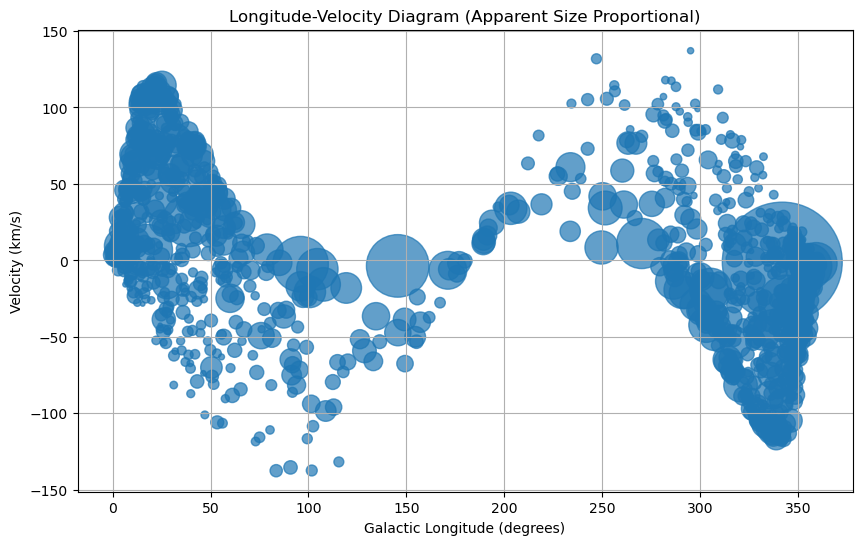

In [34]:
from physiokinematic import plot
plot.plot_longitude_velocity_diagram(hii_data)

In [31]:
import importlib
importlib.reload(plot)

<module 'physiokinematic.plot' from '/Users/ryanbakko/Desktop/Trey Research/physiokinematic/physiokinematic/plot.py'>

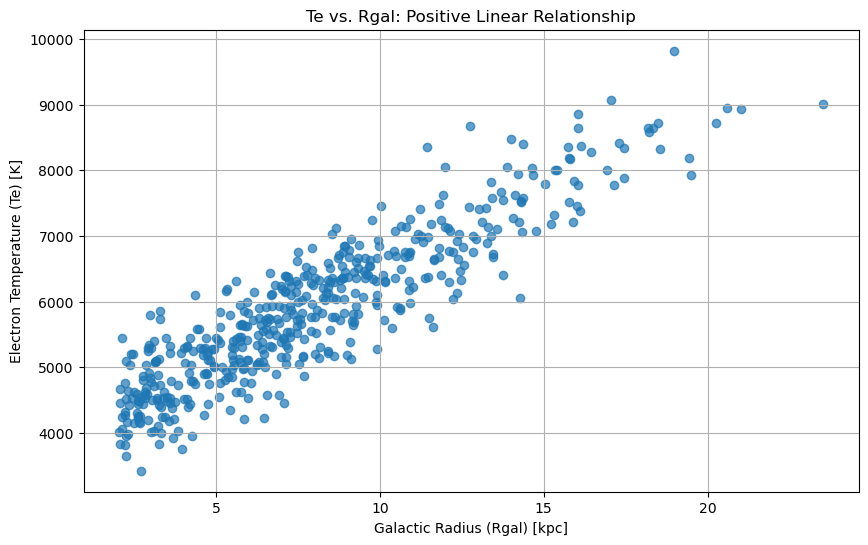

In [35]:
plot.plot_te_vs_rgal(hii_data)

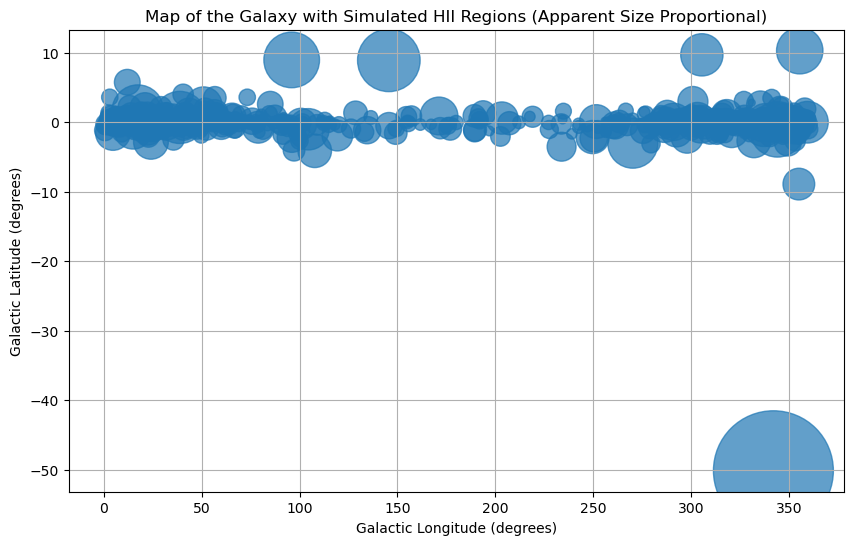

In [36]:
plot.plot_galaxy_map(hii_data)
